<a href="https://colab.research.google.com/github/SamradhiSingh/OIBSIP-2-/blob/main/Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Loading the dataset

In [ ]:
airbnb_data = pd.read_csv('/content/AB_NYC_2019[2].csv')


In [ ]:
# represting first 5 rows of the dataset
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# Explore the structure and statistics of the dataset extracted
print(airbnb_data.head())
print(airbnb_data.describe())

     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

Processing or cleaning the dataset

In [ ]:
# Handle missing values
airbnb_data.dropna(inplace=True)

In [ ]:
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Data Visualization

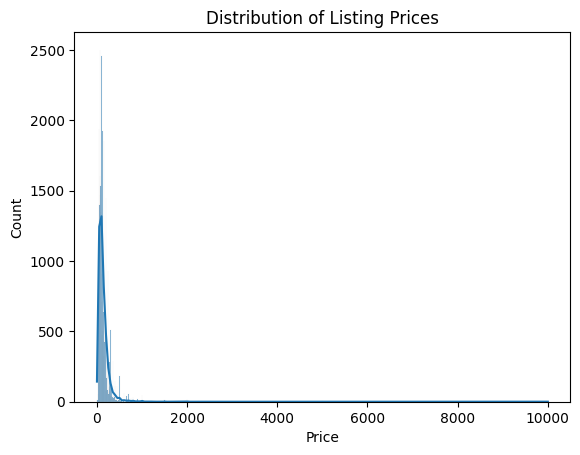

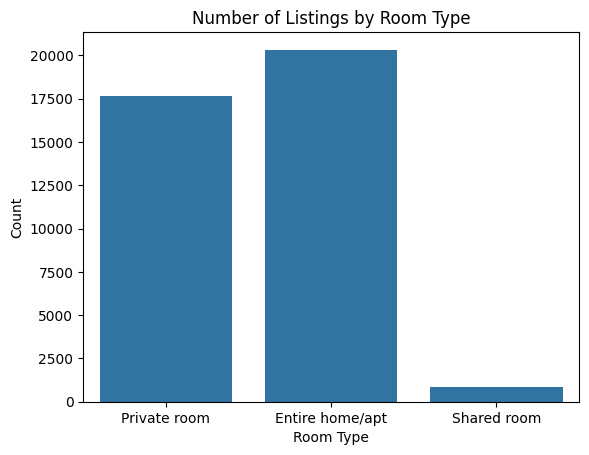

In [ ]:
sns.histplot(airbnb_data['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Distribution of Listing Prices')
plt.show()

sns.countplot(x='room_type', data=airbnb_data)
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Number of Listings by Room Type')
plt.show()

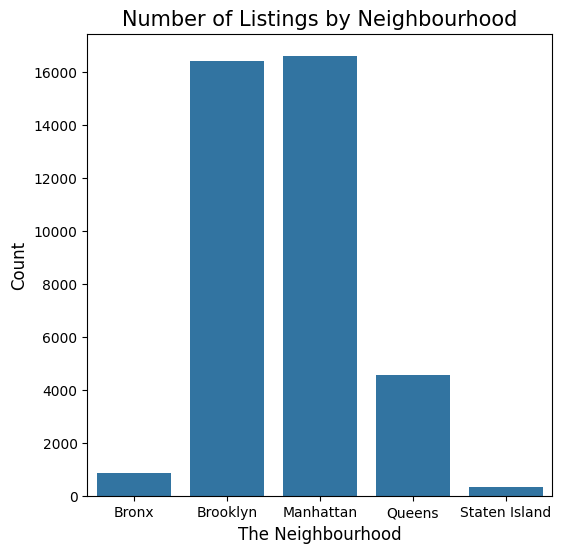

In [ ]:
# no.of listing by neighbourhood
airbnb_data.rename(columns={'neighbourhood_group':'boroname'}, inplace=True)
borough_count = airbnb_data.groupby('boroname').agg('count').reset_index()

#Plot the count by borough
fig, ax1 = plt.subplots(1,1, figsize=(6,6)
                       )
sns.barplot(x='boroname', y='id', data=borough_count, ax=ax1)

ax1.set_title('Number of Listings by Neighbourhood', fontsize=15)
ax1.set_xlabel('The Neighbourhood', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.tick_params(axis='both', labelsize=10)

<ipython-input-42-3c16a9d1b679>:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  nyc = gpd.read_file(gpd.datasets.get_path('nybb'))


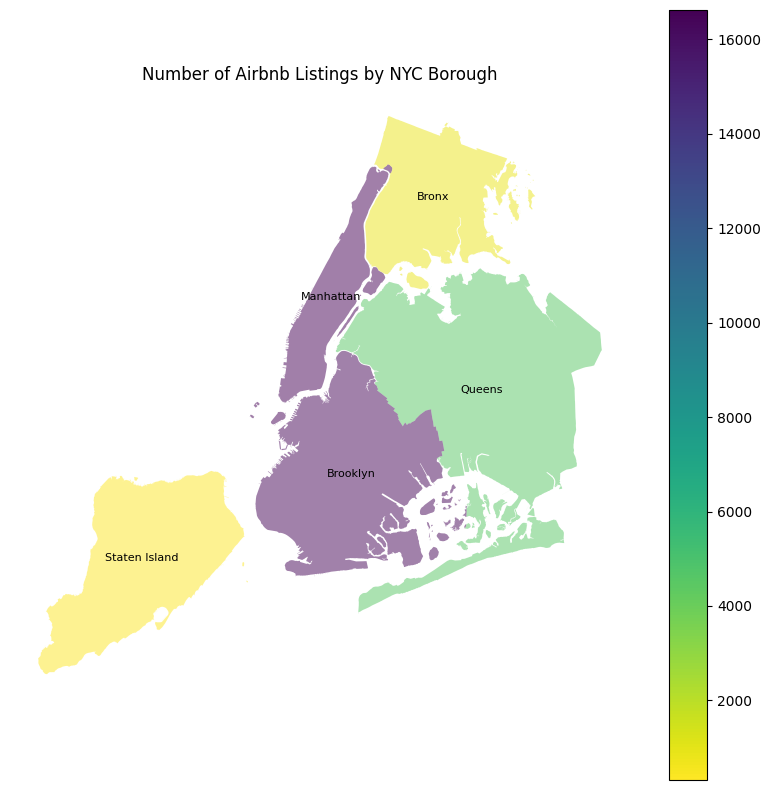

In [ ]:
# plotting it in the map as well for better understanding of the size and the location in terms of square feet
import geopandas as gpd
nyc = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc.rename(columns={'BoroName':'boroname'}, inplace=True)
bc_geo = nyc.merge(borough_count, on='boroname')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo.plot(column='id', cmap='viridis_r', alpha=0.5, ax=ax, legend=True)

# Add borough names as annotations
bc_geo.apply(lambda x: ax.annotate(
    text=x.boroname,  # Use 'text' instead of 's'
    color='black',
    xy=x.geometry.centroid.coords[0],
    ha='center',
    fontsize=8),  # Optional: Adjust the fontsize for better visibility
    axis=1)


plt.title("Number of Airbnb Listings by NYC Borough")
plt.axis('off')
plt.show()

In [ ]:
print(airbnb_data.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
boroname                           object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [ ]:
airbnb_data.head()

,id,name,host_id,host_name,boroname,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


Correlation Analysis

This is used to examine the correlations bwtween numerical variables to identify relationaships that can be useful for further analysis

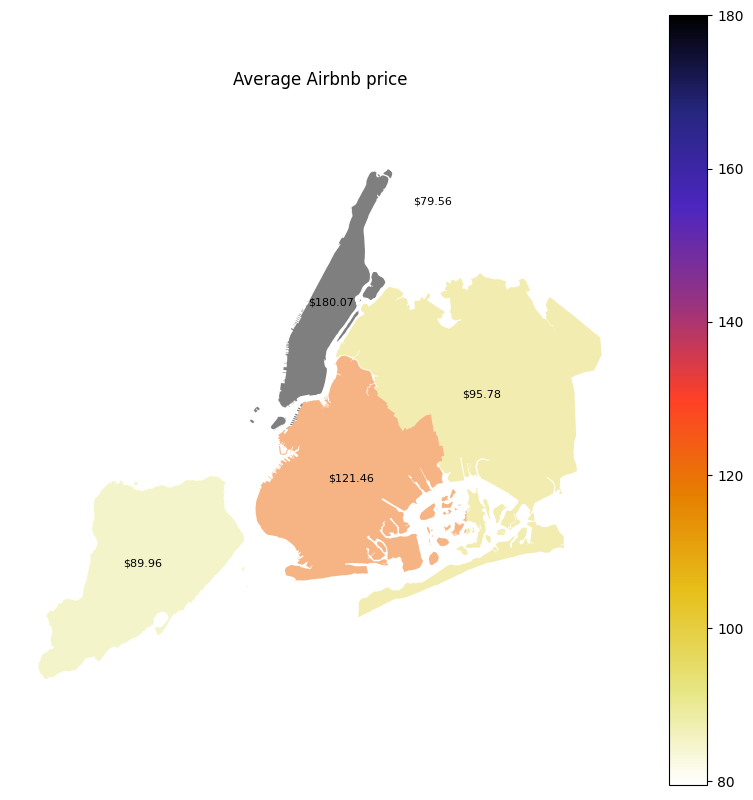

In [ ]:
avg_price_by_borough = airbnb_data.groupby('boroname')['price'].mean().reset_index()
bc_geo_avg_price = nyc.merge(avg_price_by_borough, on='boroname')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
bc_geo_avg_price.plot(column ='price', cmap='CMRmap_r', alpha = 0.5, ax=ax, legend=True)

#add borough names as annotations
bc_geo_avg_price.apply(lambda x: ax.annotate(
    text= f"${x.price:.2f}",
    color ='black',
    xy=x.geometry.centroid.coords[0],
    ha= 'center',
    fontsize= 8), axis=1)

plt.title("Average Airbnb price")
plt.axis('off')
plt.show()

Here clearly Manhattan is highly priced than the others which means the demand is high and much more supply is needed

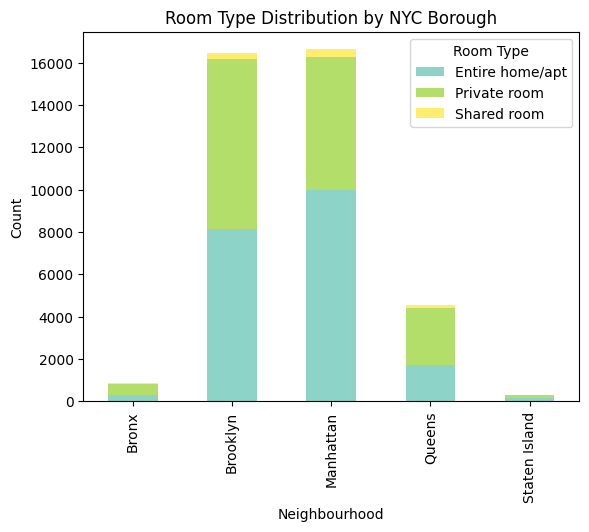

In [ ]:
room_type_distribution = airbnb_data.groupby(['boroname','room_type']).size().unstack().reset_index()
room_type_distribution.set_index('boroname',inplace=True)

room_type_distribution.plot(kind='bar', stacked=True, colormap='Set3')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Room Type Distribution by NYC Borough')
plt.legend(title= 'Room Type')
plt.show()

In [ ]:
# selecting specific columns
selected_columns = ['host_id', 'boroname','neighbourhood','room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365','price']
airbnb_data_selected = airbnb_data[selected_columns]

# handle categorical variables
categorical_columns = ['boroname','neighbourhood','room_type']
airbnb_data_encoded = pd.get_dummies(airbnb_data_selected, columns=categorical_columns)



Model Development

In [ ]:
x = airbnb_data_encoded.drop('price', axis= 1)
y= airbnb_data_encoded['price']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state= 42)

model= LinearRegression()
model.fit(x_train,y_train)

y_pred= model.predict(x_test)

print('The Mean Squared Error=', mean_squared_error(y_test, y_pred))
print('The R-Squared=', r2_score(y_test, y_pred))

The Mean Squared Error= 27880.502865799972
The R-Squared= 0.16653130233963953


Mean Sqaure: It is the average difference between the predictive variables and true values .

R-Sqaured: It represents the proportion of variance from the predictive variable and the independent variable. The values will be between 0 and 1 so higher value is needed to detemine a good model